In [1]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv("../data/fitness_gym.csv")

# Converter a coluna de data para formato datetime
df["date"] = pd.to_datetime(df["date"])

# Conferir a estrutura do DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   check_in_id          200 non-null    object        
 1   date                 200 non-null    datetime64[ns]
 2   time                 200 non-null    object        
 3   member_id            200 non-null    object        
 4   age                  200 non-null    int64         
 5   gender               200 non-null    object        
 6   membership_type      200 non-null    object        
 7   activity             200 non-null    object        
 8   duration_minutes     200 non-null    int64         
 9   calories_burned      200 non-null    int64         
 10  activity_category    200 non-null    object        
 11  attendance_streak    200 non-null    int64         
 12  satisfaction_score   200 non-null    int64         
 13  cancelled            200 non-null  

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
0,CHECK_0001,2023-01-01,07:16:00,MEMBER_0054,56,F,Basic,Yoga,50,162,Bem-estar,5,4,False,NaN
1,CHECK_0002,2023-01-02,18:47:00,MEMBER_0021,18,F,Premium,CrossFit,64,633,Funcional,22,5,False,NaN
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,NaN
3,CHECK_0004,2023-01-08,12:10:00,MEMBER_0016,19,F,Basic,Jump,41,360,Cardio,11,4,False,NaN
4,CHECK_0005,2023-01-12,08:14:00,MEMBER_0059,26,M,Basic,Musculação,81,462,Força,9,5,False,NaN


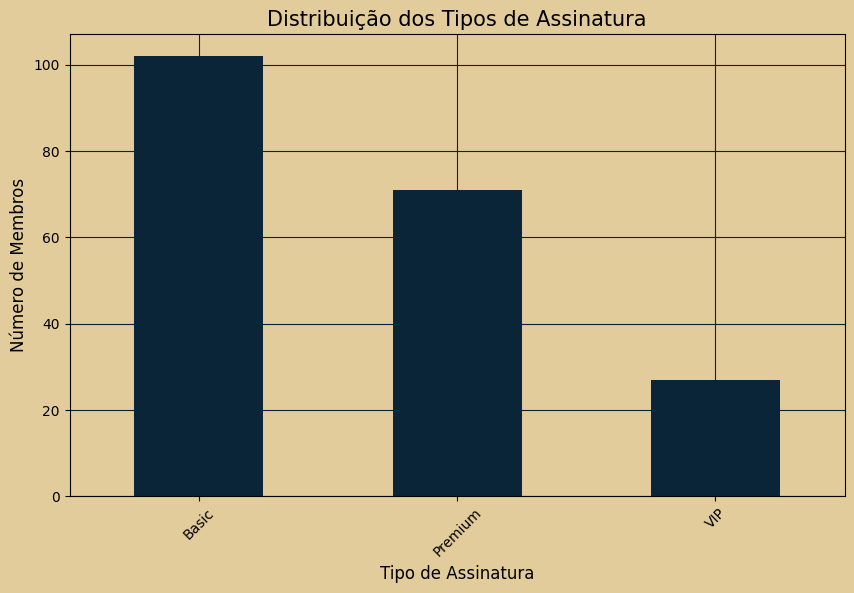

In [2]:
import matplotlib.pyplot as plt

# Comparação de tipos de assinatura
membership_counts = df[
    "membership_type"
].value_counts()

plt.figure(figsize=(10, 6), facecolor="#E2CC9C")
membership_counts.plot(
    kind="bar", color="#0A2538"
)
plt.gca().set_facecolor("#E2CC9C")
plt.title(
    "Distribuição dos Tipos de Assinatura",
    fontsize=15,
)
plt.xlabel("Tipo de Assinatura", fontsize=12)
plt.ylabel("Número de Membros", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, color="#0A2538")
plt.show()

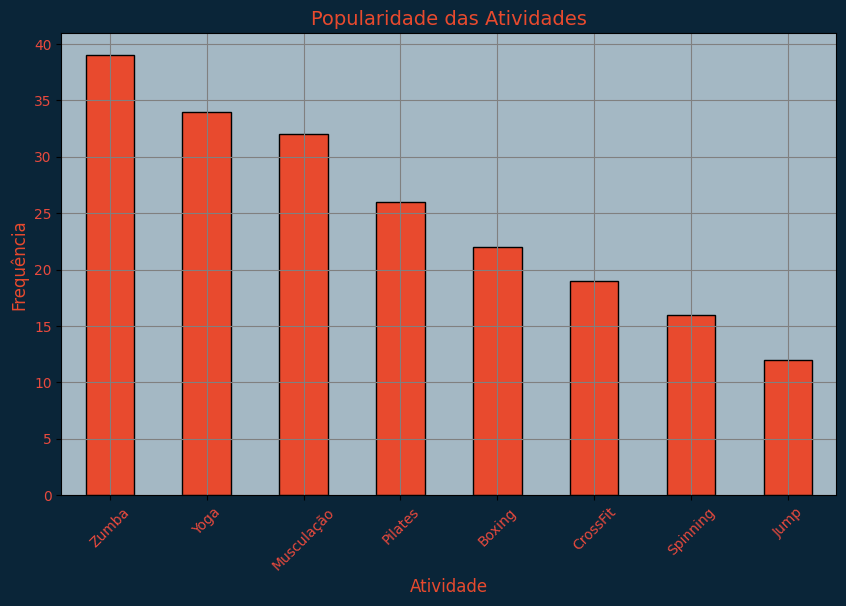

In [3]:
# Comparação de atividades populares
activity_counts = df["activity"].value_counts()

plt.figure(figsize=(10, 6), facecolor="#0A2538")
activity_counts.plot(
    kind="bar",
    color="#E84A2E",
    linewidth=1,
    edgecolor="black",
)
plt.gca().set_facecolor("#A4B8C4")
plt.title(
    "Popularidade das Atividades",
    fontsize=14,
    color="#E84A2E",
)
plt.xlabel(
    "Atividade", fontsize=12, color="#E84A2E"
)
plt.ylabel(
    "Frequência", fontsize=12, color="#E84A2E"
)
plt.xticks(color="#E84A3E")
plt.yticks(color="#E84A3E")
plt.xticks(rotation=45)
plt.grid(True, color="gray")
plt.show()

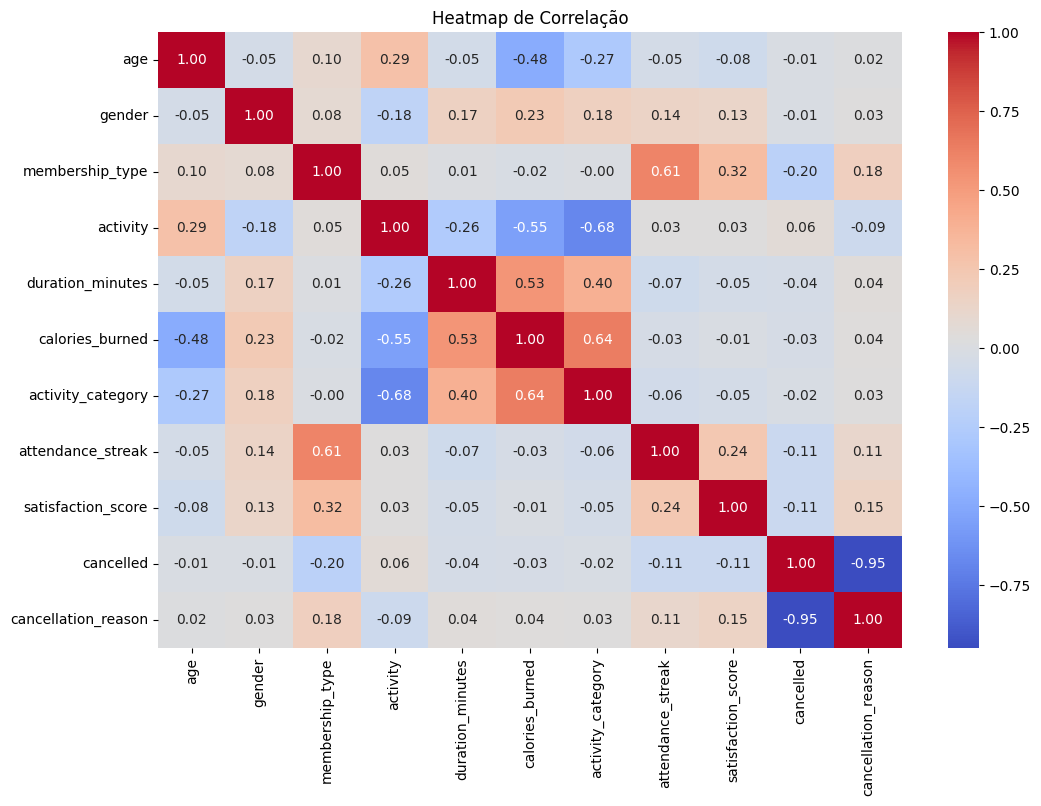

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Excluir colunas não relevantes para a correlação
df = df.drop(
    ["check_in_id", "member_id", "date", "time"],
    axis=1,
)  # Exclui identificadores e datas

# Aplicar LabelEncoder para colunas categóricas
label_encoder = LabelEncoder()
categorical_columns = [
    "gender",
    "membership_type",
    "activity",
    "activity_category",
    "cancellation_reason",
]  # ajuste conforme suas colunas
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Heatmap de correlações
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
)
plt.title("Heatmap de Correlação")
plt.show()

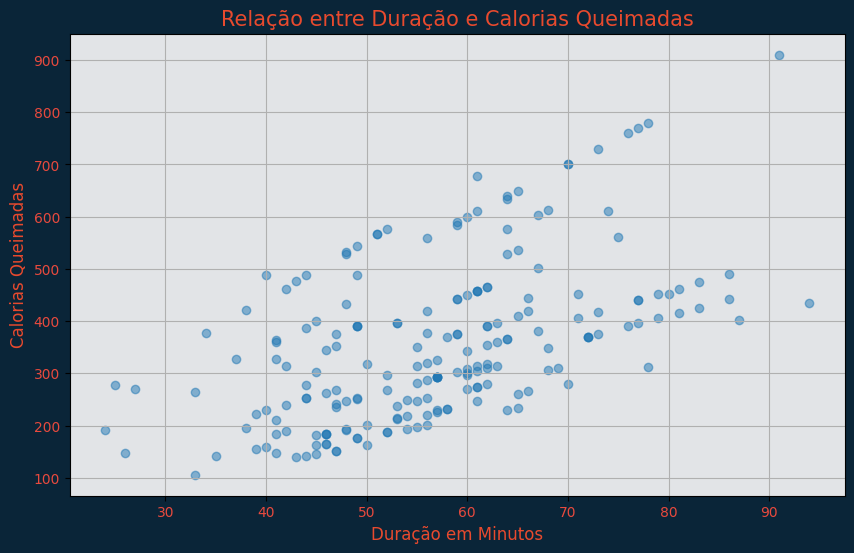

In [5]:
plt.figure(figsize=(10, 6), facecolor="#0A2538")
plt.scatter(
    df["duration_minutes"],
    df["calories_burned"],
    alpha=0.5,
)
plt.title(
    "Relação entre Duração e Calorias Queimadas",
    fontsize=15,
    color="#E84A2E",
)
plt.gca().set_facecolor("#E2E4E7")
plt.xlabel(
    "Duração em Minutos",
    color="#E84A2E",
    fontsize=12,
)
plt.ylabel(
    "Calorias Queimadas",
    color="#E84A2E",
    fontsize=12,
)
plt.xticks(color="#E84A3E")
plt.yticks(color="#E84A3E")
plt.grid(True)
plt.show()

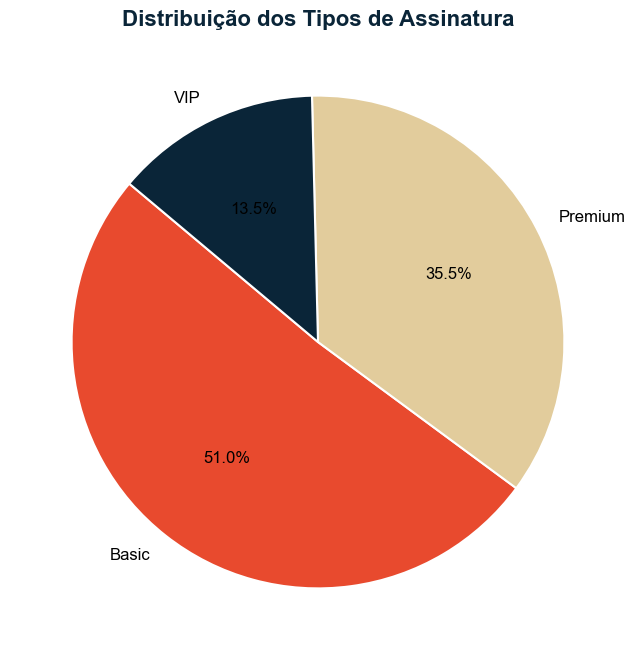

In [6]:
# Configurações do gráfico
plt.figure(figsize=(8, 8))
plt.rcParams.update(
    {"font.size": 12, "font.family": "Arial"}
)

# Criando o gráfico de pizza
membership_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["#E84A2E", "#E2CC9C", "#0A2538"],
    wedgeprops={
        "edgecolor": "white",
        "linewidth": 1.5,
    },  # Borda branca para cada setor
    startangle=140,  # Ângulo inicial para uniformizar
)

# Título
plt.title(
    "Distribuição dos Tipos de Assinatura",
    fontsize=16,
    color="#0A2538",
    weight="bold",
)

# Remover o rótulo do eixo y
plt.ylabel("")

# Exibir o gráfico
plt.show()